In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import scipy.stats as st
import statsmodels.api as sm

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [39]:
data = pd.read_csv('sadiev.aa.csv', header = None)
data.head(5)

,0
0,-0.536637
1,0.954875
2,1.657009
3,2.405817
4,3.401851


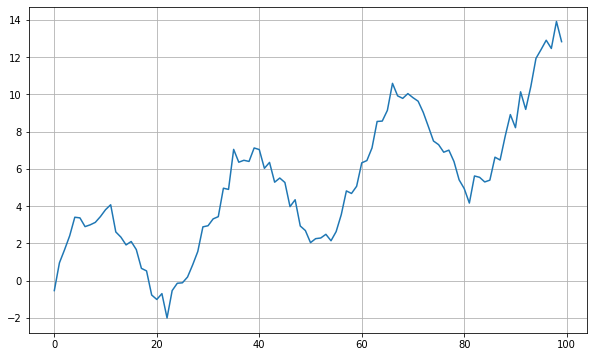

In [40]:
X = data.values
plt.figure(figsize = (10,6))
plt.plot(X)
plt.grid()
plt.show()

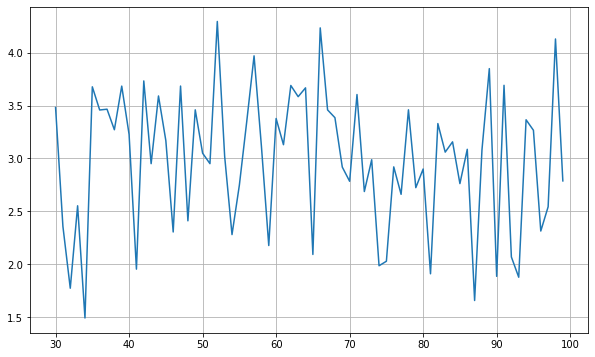

In [90]:
data_d = data.diff(periods=30)
plt.figure(figsize = (10,6))
plt.plot(data_d)
plt.grid()
plt.show()

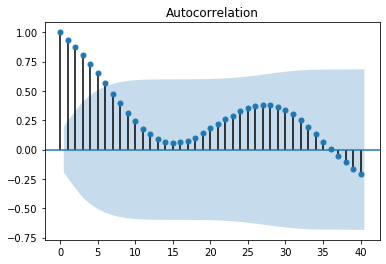

In [85]:
sm.graphics.tsa.plot_acf(X, lags=40);
plt.show();

### Вопрос 2

Значение статистики KPSS для остатков в разложение seaconal_decompose где период указан с предыдущего пункта.

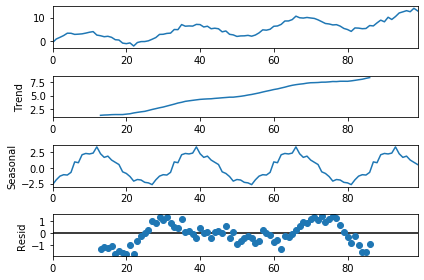

In [71]:
stl_data = seasonal_decompose(data, period=27)
_=stl_data.plot()

In [91]:
T = 30
stl_data = seasonal_decompose(data, period=T)
r = stl_data.resid.dropna()
round(kpss(r, nlags='legacy')[0], 3)

/Users/abdurakhmonsadiev/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


0.08

In [37]:
kpss(stl_data.resid, nlags='legacy')

(nan, nan, 12, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})